In [1]:
import scipy.io as sio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Graph Neural Networks: An overview
->https://towardsdatascience.com/graph-neural-networks-an-overview-dfd363b6ef87

Notebook Credit to https://www.linkedin.com/in/joshua-adrian-cahyono-5230b814b/?original_referer=

In [2]:
filename = "/kaggle/input/urban-traffic-dataset-ml-practice-work/Urban traffic_dataset/traffic_dataset.mat"
mat_contents = sio.loadmat(filename)

In [3]:
print(mat_contents)

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Mar 14 15:49:14 2020', '__version__': '1.0', '__globals__': [], 'tra_X_tr': array([[<36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        ...,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>,
        <36x48 sparse matrix of type '<class 'numpy.float64'>'
        	with 540 stored elements in Compressed Sparse Column format>]],
      dtype=object), 'tra_X_te':

In [4]:
print(mat_contents.keys())

dict_keys(['__header__', '__version__', '__globals__', 'tra_X_tr', 'tra_X_te', 'tra_Y_tr', 'tra_Y_te', 'tra_adj_mat'])


In [5]:
print(mat_contents['tra_X_tr'][0][0])

  (0, 0)	0.09248014946286783
  (1, 0)	0.09715086408220458
  (2, 0)	0.11536665109761794
  (3, 0)	0.1120971508640822
  (4, 0)	0.12704343764595982
  (5, 0)	0.12517515179822514
  (6, 0)	0.14432508173750583
  (7, 0)	0.09855207846800561
  (8, 0)	0.14946286781877627
  (9, 0)	0.18262494161606727
  (10, 0)	0.14385801027557216
  (11, 0)	0.15973843998131715
  (12, 0)	0.16814572629612332
  (13, 0)	0.15366651097617937
  (14, 0)	0.19570294255021017
  (15, 0)	0.09528257823446988
  (16, 0)	0.1742176553012611
  (17, 0)	0.23353573096683794
  (18, 0)	0.1938346567024755
  (19, 0)	0.2606258757589911
  (20, 0)	0.2554880896777207
  (21, 0)	0.2727697337692667
  (22, 0)	0.067725361980383
  (23, 0)	0.05558150397010743
  (24, 0)	0.031293787949556284
  :	:
  (22, 44)	1.0
  (23, 44)	1.0
  (24, 44)	1.0
  (25, 44)	1.0
  (4, 45)	1.0
  (5, 45)	1.0
  (6, 45)	1.0
  (7, 45)	1.0
  (15, 45)	1.0
  (16, 45)	1.0
  (17, 45)	1.0
  (18, 45)	1.0
  (19, 45)	1.0
  (20, 45)	1.0
  (21, 45)	1.0
  (26, 46)	1.0
  (27, 46)	1.0
  (28, 46)

In [6]:
X_train = mat_contents['tra_X_tr']
y_train = mat_contents['tra_Y_tr']
X_test = mat_contents['tra_X_te']
y_test = mat_contents['tra_Y_te']
adj_mat = mat_contents['tra_adj_mat']

In [7]:
print(X_train.shape)
print(X_train[0,0])

(1, 1261)
  (0, 0)	0.09248014946286783
  (1, 0)	0.09715086408220458
  (2, 0)	0.11536665109761794
  (3, 0)	0.1120971508640822
  (4, 0)	0.12704343764595982
  (5, 0)	0.12517515179822514
  (6, 0)	0.14432508173750583
  (7, 0)	0.09855207846800561
  (8, 0)	0.14946286781877627
  (9, 0)	0.18262494161606727
  (10, 0)	0.14385801027557216
  (11, 0)	0.15973843998131715
  (12, 0)	0.16814572629612332
  (13, 0)	0.15366651097617937
  (14, 0)	0.19570294255021017
  (15, 0)	0.09528257823446988
  (16, 0)	0.1742176553012611
  (17, 0)	0.23353573096683794
  (18, 0)	0.1938346567024755
  (19, 0)	0.2606258757589911
  (20, 0)	0.2554880896777207
  (21, 0)	0.2727697337692667
  (22, 0)	0.067725361980383
  (23, 0)	0.05558150397010743
  (24, 0)	0.031293787949556284
  :	:
  (22, 44)	1.0
  (23, 44)	1.0
  (24, 44)	1.0
  (25, 44)	1.0
  (4, 45)	1.0
  (5, 45)	1.0
  (6, 45)	1.0
  (7, 45)	1.0
  (15, 45)	1.0
  (16, 45)	1.0
  (17, 45)	1.0
  (18, 45)	1.0
  (19, 45)	1.0
  (20, 45)	1.0
  (21, 45)	1.0
  (26, 46)	1.0
  (27, 46)	1.0


In [8]:
print(y_train.shape)
print(y_train)

(36, 1261)
[[0.05091079 0.04764129 0.04483886 ... 0.37132181 0.42456796 0.42269967]
 [0.04624007 0.04950957 0.052312   ... 0.37085474 0.43811303 0.50116768]
 [0.05044372 0.04437179 0.05044372 ... 0.25502102 0.40168146 0.37926203]
 ...
 [0.02709014 0.01868286 0.02568893 ... 0.10322279 0.13872022 0.1424568 ]
 [0.03409622 0.02195236 0.03549743 ... 0.15787015 0.20364316 0.21064923]
 [0.04063522 0.02989257 0.05651565 ... 0.91032228 0.75198505 0.83839327]]


In [9]:
print(X_test.shape)
print(X_test[0,0])

(1, 840)
  (0, 0)	0.05698271835590846
  (1, 0)	0.04950957496496964
  (2, 0)	0.05371321812237272
  (3, 0)	0.04904250350303596
  (4, 0)	0.05044371788883699
  (5, 0)	0.03923400280242877
  (6, 0)	0.0406352171882298
  (7, 0)	0.033162073797290983
  (8, 0)	0.12424100887435778
  (9, 0)	0.12097150864082204
  (10, 0)	0.10415693601120972
  (11, 0)	0.10602522185894442
  (12, 0)	0.12330686595049042
  (13, 0)	0.1200373657169547
  (14, 0)	0.11396543671181691
  (15, 0)	0.038766931340495095
  (16, 0)	0.07192900513778608
  (17, 0)	0.07753386268099019
  (18, 0)	0.0751985053713218
  (19, 0)	0.09201307800093414
  (20, 0)	0.08874357776739841
  (21, 0)	0.1200373657169547
  (22, 0)	0.03549743110695937
  (23, 0)	0.03409621672115834
  (24, 0)	0.014479215319943952
  :	:
  (22, 44)	1.0
  (23, 44)	1.0
  (24, 44)	1.0
  (25, 44)	1.0
  (4, 45)	1.0
  (5, 45)	1.0
  (6, 45)	1.0
  (7, 45)	1.0
  (15, 45)	1.0
  (16, 45)	1.0
  (17, 45)	1.0
  (18, 45)	1.0
  (19, 45)	1.0
  (20, 45)	1.0
  (21, 45)	1.0
  (26, 46)	1.0
  (27, 46)

In [10]:
print(y_test.shape)
print(y_test)

(36, 840)
[[0.40168146 0.38019617 0.35544138 ... 0.052312   0.0555815  0.04203643]
 [0.57309668 0.61933676 0.58991126 ... 0.09107894 0.07192901 0.07239608]
 [0.39701074 0.41008874 0.36384867 ... 0.07940215 0.06071929 0.05931808]
 ...
 [0.13311537 0.19663709 0.1914993  ... 0.08547408 0.07800093 0.06725829]
 [0.20644559 0.29332088 0.30406352 ... 0.12330687 0.09388136 0.09715086]
 [0.76506305 0.81363849 0.79495563 ... 0.06819243 0.05277908 0.04437179]]


In [11]:
print(adj_mat.shape)
print(adj_mat)

(36, 36)
[[0 1 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
feat_name = []
for i in range(10):
    feat_name.append(f'prev_{i+1}')

for i in range(5):
    feat_name.append(f'feata_{i+1}')
    
for i in range(24):
    feat_name.append(f'hour_{i+1}')
    
feat_name.append(f'no_roads')

for i in range(4):
    feat_name.append(f'featb_{i+1}')
    
for i in range(4):
    feat_name.append(f'featc_{i+1}')
    
print(feat_name)

['prev_1', 'prev_2', 'prev_3', 'prev_4', 'prev_5', 'prev_6', 'prev_7', 'prev_8', 'prev_9', 'prev_10', 'feata_1', 'feata_2', 'feata_3', 'feata_4', 'feata_5', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'hour_24', 'no_roads', 'featb_1', 'featb_2', 'featb_3', 'featb_4', 'featc_1', 'featc_2', 'featc_3', 'featc_4']


In [13]:
X_train_list = []
for timestep, feat_mat in tqdm.tqdm(enumerate(X_train[0])):
    feat_mat = feat_mat.toarray()
    for i in range(len(feat_mat)):
        row_dict = {
            "timestep" : timestep,
            "location" : i,
            "traffic"  : y_train[i][timestep]
        } 
        for j in range(len(feat_mat[0])):
            try:
                row_dict[feat_name[j]] = feat_mat[i][j]
            except:
                row_dict[feat_name[j]] = 0
        X_train_list.append(row_dict)
X_train_list[:3]

1261it [00:01, 837.46it/s]


[{'timestep': 0,
  'location': 0,
  'traffic': 0.05091078935077067,
  'prev_1': 0.09248014946286783,
  'prev_2': 0.0966837926202709,
  'prev_3': 0.07006071929005138,
  'prev_4': 0.0658570761326483,
  'prev_5': 0.07846800560485755,
  'prev_6': 0.07146193367585241,
  'prev_7': 0.0541802895843064,
  'prev_8': 0.044371788883699206,
  'prev_9': 0.05464736104624007,
  'prev_10': 0.05091078935077067,
  'feata_1': 1.0,
  'feata_2': 0.0,
  'feata_3': 0.0,
  'feata_4': 0.0,
  'feata_5': 0.0,
  'hour_1': 1.0,
  'hour_2': 0.0,
  'hour_3': 0.0,
  'hour_4': 0.0,
  'hour_5': 0.0,
  'hour_6': 0.0,
  'hour_7': 0.0,
  'hour_8': 0.0,
  'hour_9': 0.0,
  'hour_10': 0.0,
  'hour_11': 0.0,
  'hour_12': 0.0,
  'hour_13': 0.0,
  'hour_14': 0.0,
  'hour_15': 0.0,
  'hour_16': 0.0,
  'hour_17': 0.0,
  'hour_18': 0.0,
  'hour_19': 0.0,
  'hour_20': 0.0,
  'hour_21': 0.0,
  'hour_22': 0.0,
  'hour_23': 0.0,
  'hour_24': 0.0,
  'no_roads': 3.0,
  'featb_1': 1.0,
  'featb_2': 0.0,
  'featb_3': 0.0,
  'featb_4': 0.0,

In [14]:
X_test_list = []
for timestep, feat_mat in tqdm.tqdm(enumerate(X_test[0])):
    feat_mat = feat_mat.toarray()
    for i in range(len(feat_mat)):
        row_dict = {
            "timestep" : timestep,
            "location" : i,
            "traffic"  : y_test[i][timestep]
        } 
        for j in range(len(feat_mat[0])):
            try:
                row_dict[feat_name[j]] = feat_mat[i][j]
            except:
                row_dict[feat_name[j]] = 0
        X_test_list.append(row_dict)
X_test_list[:3]

840it [00:01, 819.14it/s]


[{'timestep': 0,
  'location': 0,
  'traffic': 0.40168145726296123,
  'prev_1': 0.05698271835590846,
  'prev_2': 0.07146193367585241,
  'prev_3': 0.08033629145259225,
  'prev_4': 0.09808500700607192,
  'prev_5': 0.14759458197104158,
  'prev_6': 0.18496029892573565,
  'prev_7': 0.2480149462867819,
  'prev_8': 0.26015880429705746,
  'prev_9': 0.3713218122372723,
  'prev_10': 0.4245679588977114,
  'feata_1': 0.0,
  'feata_2': 0.0,
  'feata_3': 0.0,
  'feata_4': 1.0,
  'feata_5': 0.0,
  'hour_1': 0.0,
  'hour_2': 0.0,
  'hour_3': 0.0,
  'hour_4': 1.0,
  'hour_5': 0.0,
  'hour_6': 0.0,
  'hour_7': 0.0,
  'hour_8': 0.0,
  'hour_9': 0.0,
  'hour_10': 0.0,
  'hour_11': 0.0,
  'hour_12': 0.0,
  'hour_13': 0.0,
  'hour_14': 0.0,
  'hour_15': 0.0,
  'hour_16': 0.0,
  'hour_17': 0.0,
  'hour_18': 0.0,
  'hour_19': 0.0,
  'hour_20': 0.0,
  'hour_21': 0.0,
  'hour_22': 0.0,
  'hour_23': 0.0,
  'hour_24': 0.0,
  'no_roads': 3.0,
  'featb_1': 1.0,
  'featb_2': 0.0,
  'featb_3': 0.0,
  'featb_4': 0.0,


In [15]:
df_X_train = pd.DataFrame(X_train_list)
df_X_train.head()

,timestep,location,traffic,prev_1,prev_2,prev_3,prev_4,prev_5,prev_6,prev_7,...,hour_24,no_roads,featb_1,featb_2,featb_3,featb_4,featc_1,featc_2,featc_3,featc_4
0,0,0,0.050911,0.092480,0.096684,0.070061,0.065857,0.078468,0.071462,0.054180,...,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0.046240,0.097151,0.102289,0.081738,0.076600,0.072396,0.067725,0.058851,...,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,2,0.050444,0.115367,0.110696,0.105558,0.095283,0.067725,0.080336,0.062588,...,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,3,0.044839,0.112097,0.102756,0.092013,0.083606,0.062121,0.070995,0.053713,...,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,4,0.044839,0.127043,0.150864,0.131714,0.106025,0.099019,0.090612,0.069127,...,0.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [16]:
df_X_test = pd.DataFrame(X_test_list)
df_X_test.head()

,timestep,location,traffic,prev_1,prev_2,prev_3,prev_4,prev_5,prev_6,prev_7,...,hour_24,no_roads,featb_1,featb_2,featb_3,featb_4,featc_1,featc_2,featc_3,featc_4
0,0,0,0.401681,0.056983,0.071462,0.080336,0.098085,0.147595,0.184960,0.248015,...,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,1,0.573097,0.049510,0.054180,0.081738,0.074731,0.120504,0.189164,0.254554,...,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0,2,0.397011,0.053713,0.044372,0.068660,0.072863,0.104157,0.152732,0.200374,...,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0,3,0.463335,0.049043,0.054647,0.070995,0.073797,0.098085,0.153199,0.205044,...,0.0,3.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0,4,0.284914,0.050444,0.058851,0.053713,0.054647,0.068192,0.084073,0.119570,...,0.0,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [17]:
df_adj = pd.DataFrame(adj_mat)
df_adj.head()

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [18]:
print(len(df_X_train))
print(len(df_X_test))
print(len(df_adj))

45396
30240
36


In [19]:
df_X_test.mean() 
# 1-5
# 6-29 is hour
# 30 is no of roads
# 31-34
# 35-38

timestep    419.500000
location     17.500000
traffic       0.321344
prev_1        0.321839
prev_2        0.322055
prev_3        0.322254
prev_4        0.322422
prev_5        0.322534
prev_6        0.322576
prev_7        0.322547
prev_8        0.322461
prev_9        0.322281
prev_10       0.322018
feata_1       0.228571
feata_2       0.217857
feata_3       0.114286
feata_4       0.210714
feata_5       0.228571
hour_1        0.038095
hour_2        0.038095
hour_3        0.038095
hour_4        0.041667
hour_5        0.042857
hour_6        0.042857
hour_7        0.042857
hour_8        0.042857
hour_9        0.042857
hour_10       0.042857
hour_11       0.042857
hour_12       0.042857
hour_13       0.041667
hour_14       0.041667
hour_15       0.042857
hour_16       0.042857
hour_17       0.042857
hour_18       0.042857
hour_19       0.042857
hour_20       0.042857
hour_21       0.042857
hour_22       0.041667
hour_23       0.038095
hour_24       0.038095
no_roads      3.527778
featb_1    

In [20]:
df_X_train.to_csv("train.csv")
df_X_test.to_csv("test.csv")
df_adj.to_csv("adj_matrix.csv")

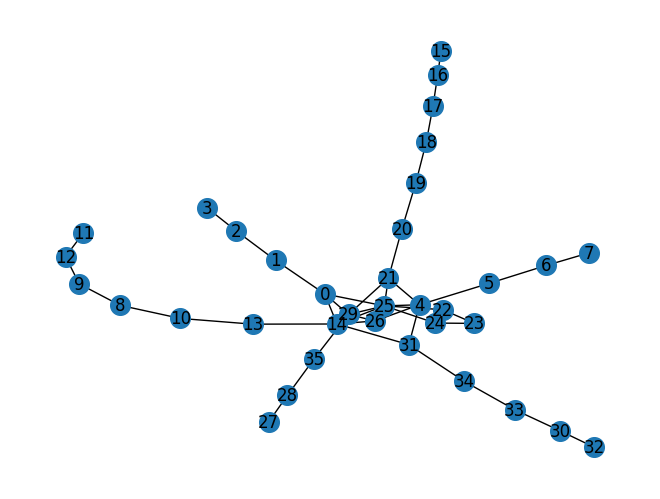

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

def show_graph_with_labels(adjacency_matrix):
    rows, cols = np.where(adjacency_matrix == 1)
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    nx.draw(gr, node_size=200, with_labels=True)
    plt.show()

show_graph_with_labels(df_adj)